# BOSTEN_HOUSE_PREDICTION

Author ~ Saurabh Kumar

Date ~ 4-DEC-21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [2]:
import ipywidgets as ipyw
from IPython.display import display
style = {'description_width': 'initial'}

In [3]:
pwd

'E:\\DataScience\\MachineLearning\\Boston_house_prediction'

In [4]:
import os 
path='E:\\DataScience\\MachineLearning\\Boston_house_prediction'
os.listdir(path)

['.ipynb_checkpoints', 'Bosten_house_predict.ipynb', 'kc_house_data.csv']

In [5]:
df =pd.read_csv('E:\\DataScience\\MachineLearning\\Boston_house_prediction\\kc_house_data.csv')

In [6]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21611.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.396095     291.509045   1971.005136     84.402258   
std        1.175459    828.128162     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [9]:
df=df.drop(["id","date"],axis=1)

In [10]:
df=df.replace(to_replace = np.nan, value = 0) 

In [11]:
df.notnull().count()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [12]:
df.shape

(21613, 19)

In [13]:
df.isnull()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
...      ...       ...        ...          ...       ...     ...         ...   
21608  False     False      False        False     False   False       False   
21609  False     False      False        False     False   False       False   
21610  False     False      False        False     False   False       False   
21611  False     False      False        False     False   False       False   
21612  False     False      False        False     False   False       False   

        view  condition  grade  sqft_above  sqft_basement  yr_built  \
0      False      False  False       False          False     False   
1      False      False  False       False          False     False   
2      False      False  False       False          False     False   
3      False      False  False       False          False     False   
4      False      False  False       False          False     False   
...      ...        ...    ...         ...            ...       ...   
21608  False      False  False       False          False     False   
21609  False      False  False       False          False     False   
21610  False      False  False       False          False     False   
21611  False      False  False       False          False     False   
21612  False      False  False       False          False     False   

       yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
0             False    False  False  False          False       False  
1             False    False  False  False          False       False  
2             False    False  False  False          False       False  
3             False    False  False  False          False       False  
4             False    False  False  False          False       False  
...             ...      ...    ...    ...            ...         ...  
21608         False    False  False  False          False       False  
21609         False    False  False  False          False       False  
21610         False    False  False  False          False       False  
21611         False    False  False  False          False       False  
21612         False    False  False  False          False       False  

[21613 rows x 19 columns]

In [14]:
corr = df.corr()
corr.shape

(19, 19)

In [15]:
df.corr(method='pearson')

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605416  0.477479   0.685273     0.876288  0.183510  0.523867   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605416   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477479   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685273   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876288   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183510   
floors           0.023698  0.029444  -0.263768  0.458183    0.523867   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072076   
view             0.401857  1.000000   0.045990  0.251321    0.167673   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158195   
grade            0.082775  0.251321  -0.144674  1.000000    0.755781   
sqft_above       0.072076  0.167673  -0.158195  0.755781    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.052204   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423996   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023320   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261038   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000914   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343760   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731729   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194051   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.052204  0.423996      0.023320 -0.261038 -0.000914   
sqft_basement       1.000000 -0.133124      

In [16]:
df.corr(method='kendall')

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.265094   0.369208     0.463611  0.047192  0.251624   
bedrooms       0.265094  1.000000   0.439437     0.521343  0.164711  0.201755   
bathrooms      0.369208  0.439437   1.000000     0.588170  0.049858  0.450942   
sqft_living    0.463611  0.521343   0.588170     1.000000  0.206619  0.316298   
sqft_lot       0.047192  0.164711   0.049858     0.206619  1.000000 -0.186403   
floors         0.251624  0.201755   0.450942     0.316298 -0.186403  1.000000   
waterfront     0.094069 -0.007075   0.043063     0.057522  0.069937  0.022804   
view           0.237573  0.074568   0.133024     0.187790  0.094163  0.018461   
condition      0.014481  0.011399  -0.137527    -0.049774  0.090208 -0.265336   
grade          0.527834  0.330748   0.556446     0.586439  0.111692  0.435440   
sqft_above     0.378097  0.429146   0.530517     0.697000  0.185623  0.475391   
sqft_basement  0.190396  0.196839   0.153178     0.266206  0.028180 -0.236002   
yr_built       0.070320  0.141344   0.428921     0.244636 -0.005228  0.417252   
yr_renovated   0.082378  0.015510   0.036671     0.042652  0.006929  0.011893   
zipcode       -0.009827 -0.127689  -0.143637    -0.138096 -0.205182 -0.049725   
lat            0.292897 -0.015598   0.005416     0.020369 -0.080586  0.019379   
long           0.039867  0.144266   0.187418     0.191623  0.258072  0.115424   
sqft_living15  0.405032  0.346039   0.430040     0.570275  0.244149  0.239920   
sqft_lot15     0.038426  0.153098   0.045497     0.192472  0.792305 -0.183754   

               waterfront      view  condition     grade  sqft_above  \
price            0.094069  0.237573   0.014481  0.527834    0.378097   
bedrooms        -0.007075  0.074568   0.011399  0.330748    0.429146   
bathrooms        0.043063  0.133024  -0.137527  0.556446    0.530517   
sqft_living      0.057522  0.187790  -0.049774  0.586439    0.697000   
sqft_lot         0.069937  0.094163   0.090208  0.111692    0.185623   
floors           0.022804  0.018461  -0.265336  0.435440    0.475391   
waterfront       1.000000  0.280157   0.016213  0.056808    0.044597   
view             0.280157  1.000000   0.043801  0.195493    0.116303   
condition        0.016213  0.043801   1.000000 -0.148802   -0.125831   
grade            0.056808  0.195493  -0.148802  1.000000    0.580781   
sqft_above       0.044597  0.116303  -0.125831  0.580781    1.000000   
sqft_basement    0.047104  0.211609   0.141993  0.078925   -0.117977   
yr_built        -0.023492 -0.053792  -0.319079  0.386239    0.332454   
yr_renovated     0.090711  0.093918  -0.063436  0.014477    0.025107   
zipcode          0.024369  0.063370  -0.018536 -0.137322   -0.182897   
lat             -0.015552 -0.000090  -0.017630  0.073355   -0.017339   
long            -0.031180 -0.082784  -0.068146  0.166300    0.261257   
sqft_living15    0.061023  0.206549  -0.069246  0.536546    0.515180   
sqft_lot15       0.075399  0.093819   0.092523  0.114558    0.172948   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.190396  0.070320      0.082378 -0.009827  0.292897   
bedrooms            0.196839  0.141344      0.015510 -0.127689 -0.015598   
bathrooms           0.153178  0.428921      0.036671 -0.143637  0.005416   
sqft_living         0.266206  0.244636      0.042652 -0.138096  0.020369   
sqft_lot            0.028180 -0.005228      0.006929 -0.205182 -0.080586   
floors             -0.236002  0.417252      0.011893 -0.049725  0.019379   
waterfront          0.047104 -0.023492      0.090711  0.024369 -0.015552   
view                0.211609 -0.053792      0.093918  0.063370 -0.000090   
condition           0.141993 -0.319079     -0.063436 -0.018536 -0.017630   
grade               0.078925  0.386239      0.014477 -0.137322  0.073355   
sqft_above         -0.117977  0.332454      0.025107 -0.182897 -0.017339   
sqft_basement       1.000000 -0.129755      

In [17]:
df.corr(method='spearman')

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.344652   0.497160     0.644191  0.074939  0.322347   
bedrooms       0.344652  1.000000   0.521406     0.647366  0.216531  0.227541   
bathrooms      0.497160  0.521406   1.000000     0.745526  0.068805  0.546800   
sqft_living    0.644191  0.647366   0.745526     1.000000  0.304159  0.401267   
sqft_lot       0.074939  0.216531   0.068805     0.304159  1.000000 -0.234433   
floors         0.322347  0.227541   0.546800     0.401267 -0.234433  1.000000   
waterfront     0.115089 -0.007598   0.049522     0.070326  0.085601  0.023879   
view           0.293931  0.081421   0.155549     0.232994  0.117033  0.019655   
condition      0.018490  0.012660  -0.162891    -0.062638  0.114724 -0.287915   
grade          0.658215  0.380534   0.658194     0.716400  0.152049  0.501684   
sqft_above     0.541569  0.539609   0.690962     0.843283  0.272400  0.599282   
sqft_basement  0.251704  0.230496   0.191848     0.327878  0.036624 -0.272458   
yr_built       0.102038  0.180022   0.566982     0.352421 -0.037569  0.551663   
yr_renovated   0.101876  0.016877   0.042688     0.052679  0.008536  0.012579   
zipcode       -0.008735 -0.167186  -0.204783    -0.206848 -0.319494 -0.061461   
lat            0.456409 -0.021185   0.008283     0.030980 -0.122052  0.024564   
long           0.063537  0.191389   0.261539     0.284584  0.370551  0.148651   
sqft_living15  0.572290  0.443816   0.570304     0.746982  0.359572  0.305434   
sqft_lot15     0.062766  0.201577   0.063111     0.283864  0.922316 -0.231386   

               waterfront      view  condition     grade  sqft_above  \
price            0.115089  0.293931   0.018490  0.658215    0.541569   
bedrooms        -0.007598  0.081421   0.012660  0.380534    0.539609   
bathrooms        0.049522  0.155549  -0.162891  0.658194    0.690962   
sqft_living      0.070326  0.232994  -0.062638  0.716400    0.843283   
sqft_lot         0.085601  0.117033   0.114724  0.152049    0.272400   
floors           0.023879  0.019655  -0.287915  0.501684    0.599282   
waterfront       1.000000  0.284924   0.016744  0.062189    0.054500   
view             0.284924  1.000000   0.046000  0.217044    0.144436   
condition        0.016744  0.046000   1.000000 -0.167374   -0.158131   
grade            0.062189  0.217044  -0.167374  1.000000    0.711716   
sqft_above       0.054500  0.144436  -0.158131  0.711716    1.000000   
sqft_basement    0.051969  0.236525   0.161623  0.092927   -0.165750   
yr_built        -0.028605 -0.066607  -0.393816  0.500633    0.471936   
yr_renovated     0.091649  0.096539  -0.066180  0.016029    0.030975   
zipcode          0.029591  0.078215  -0.022416 -0.181552   -0.278410   
lat             -0.019044 -0.000073  -0.022341  0.103921   -0.025937   
long            -0.038139 -0.102728  -0.085270  0.222791    0.385429   
sqft_living15    0.074564  0.255793  -0.086905  0.662635    0.696529   
sqft_lot15       0.092271  0.116520   0.117719  0.156109    0.254215   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.251704  0.102038      0.101876 -0.008735  0.456409   
bedrooms            0.230496  0.180022      0.016877 -0.167186 -0.021185   
bathrooms           0.191848  0.566982      0.042688 -0.204783  0.008283   
sqft_living         0.327878  0.352421      0.052679 -0.206848  0.030980   
sqft_lot            0.036624 -0.037569      0.008536 -0.319494 -0.122052   
floors             -0.272458  0.551663      0.012579 -0.061461  0.024564   
waterfront          0.051969 -0.028605      0.091649  0.029591 -0.019044   
view                0.236525 -0.066607      0.096539  0.078215 -0.000073   
condition           0.161623 -0.393816     -0.066180 -0.022416 -0.022341   
grade               0.092927  0.500633      0.016029 -0.181552  0.103921   
sqft_above         -0.165750  0.471936      0.030975 -0.278410 -0.025937   
sqft_basement       1.000000 -0.177993      

<AxesSubplot:>

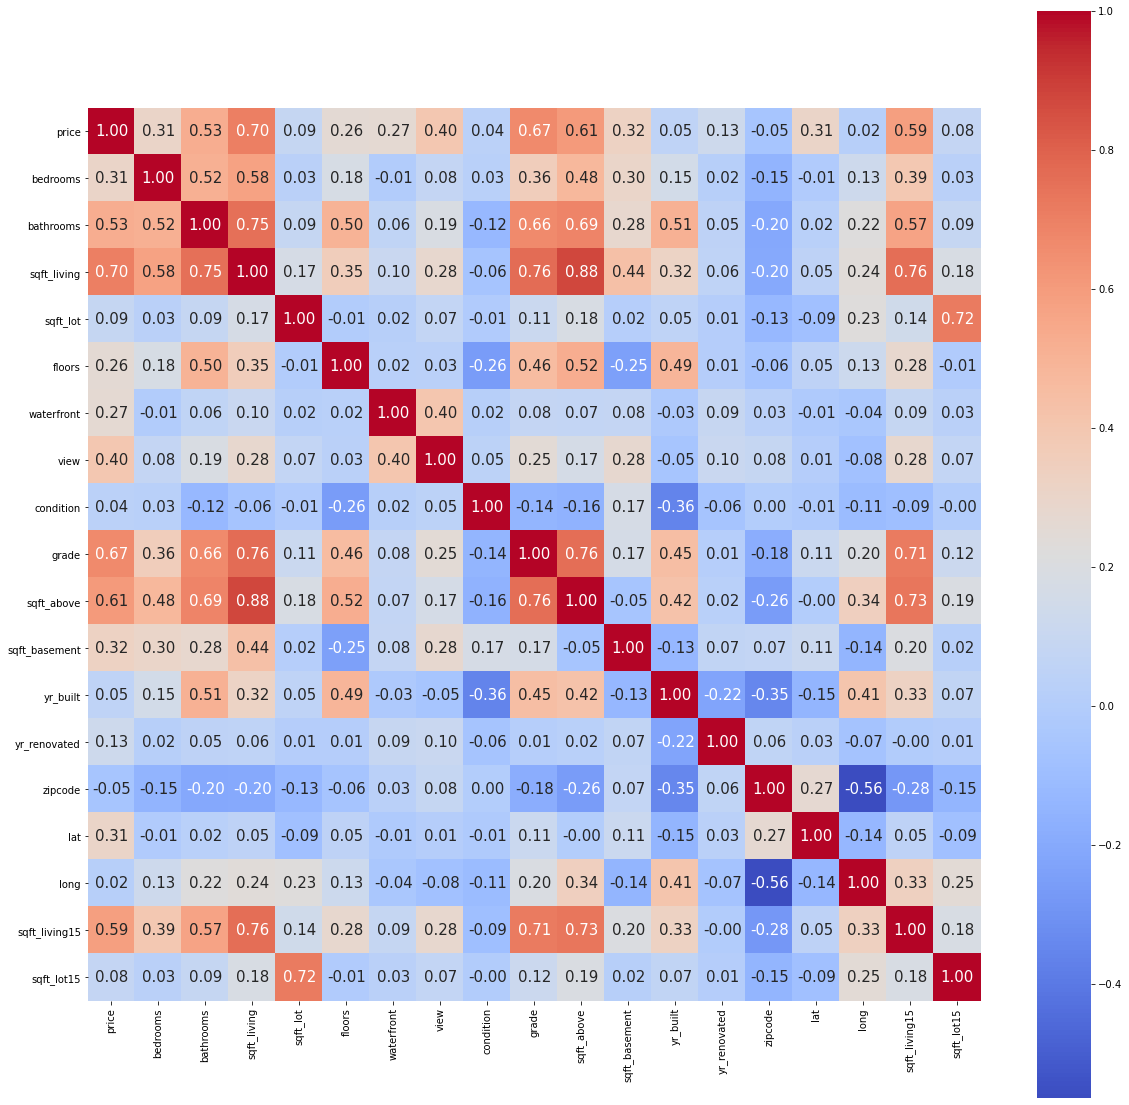

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='coolwarm')

In [19]:
wig_col = ipyw.Dropdown(
                options=[col for col in df.columns.tolist()],
                description='Features VS Price ',
                disabled=False,
                layout=ipyw.Layout(width='30%', height='30px'),
                style=style)

Dropdown(description='Features VS Price ', layout=Layout(height='30px', width='30%'), options=('price', 'bedro…

<AxesSubplot:xlabel='price', ylabel='price'>

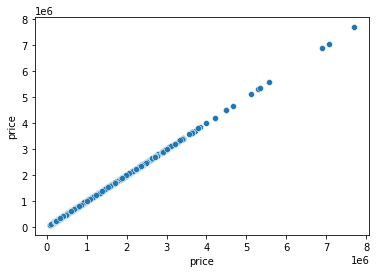

In [20]:
display(wig_col)
sns.scatterplot(x=df.price, y=wig_col.value, data=df)

In [21]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=1/3,shuffle = False,random_state=1)

# ***SVM***

In [23]:
import statsmodels.api as sm

In [24]:
model =sm.OLS(y_train,X_train).fit()

In [25]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              7386.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                        00:00:37   Log-Likelihood:                     -1.9647e+05
No. Observations:               14408   AIC:                                  3.930e+05
Df Residuals:                   14390   BIC:                                  3.931e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.791e+04   2387.730    -15.875      0.000   -4.26e+04   -3.32e+04
bathrooms      3.796e+04   4042.486      9.391      0.000       3e+04    4.59e+04
sqft_living     115.7270     82.602      1.401      0.161     -46.184     277.638
sqft_lot          0.1601      0.057      2.831      0.005       0.049       0.271
floors        -4671.3452   4593.418     -1.017      0.309   -1.37e+04    4332.346
waterfront     6.516e+05   2.16e+04     30.148      0.000    6.09e+05    6.94e+05
view           4.888e+04   2583.826     18.916      0.000    4.38e+04    5.39e+04
condition      2.659e+04   2745.553      9.684      0.000    2.12e+04     3.2e+04
grade          8.927e+04   2677.964     33.334      0.000     8.4e+04    9.45e+04
sqft_above       77.9853     82.531      0.945      0.345     -83.786     239.757
sqft_basement    35.5842     82.763      0.430      0.667    -126.643     197.811
yr_built      -2806.6644     84.559    -33.192      0.000   -2972.412   -2640.917
yr_renovated     23.9372      4.367      5.482      0.000      15.378      32.497
zipcode        -476.3444     22.225    -21.433      0.000    -519.909    -432.780
lat            5.798e+05   1.31e+04     44.238      0.000    5.54e+05    6.06e+05
long          -1.965e+05   1.63e+04    -12.089      0.000   -2.28e+05   -1.65e+05
sqft_living15    32.9553      4.297      7.670      0.000      24.533      41.377
sqft_lot15       -0.4451      0.089     -5.028      0.000      -0.619      -0.272
==============================================================================
Omnibus:                    13428.717   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1926839.456
Skew:                           4.037   Prob(JB):                         0.00
Kurtosis:                      59.075   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
y_pred=model.predict(X_test)

In [27]:
acc_rf = metrics.r2_score(y_test, y_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.697786736141147
Adjusted R^2: 0.6970297310271114
MAE: 129885.26179539564
MSE: 40275864283.79504
RMSE: 200688.47571247094


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

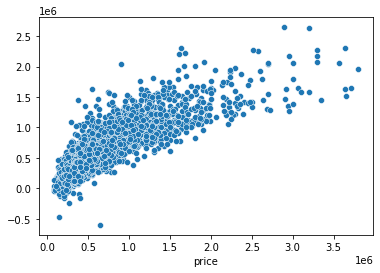

In [28]:
sns.scatterplot(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

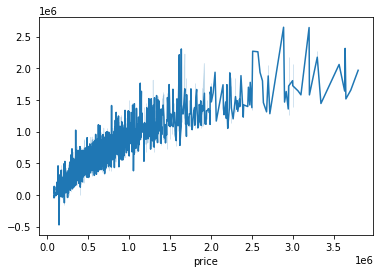

In [29]:
sns.lineplot(y_test,y_pred)

# ***RandomForest***

In [30]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
model1.predict(X_test)

array([330252.54, 471310.35, 777811.58, ..., 313066.88, 429478.5 ,
       311202.88])

In [32]:
y_pred1 = model1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

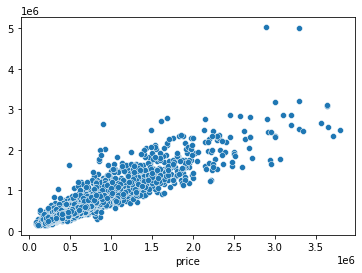

In [33]:
sns.scatterplot(y_test,y_pred1)

In [34]:
from sklearn import metrics

In [35]:
acc_rf = metrics.r2_score(y_test, y_pred1)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:',metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

R^2: 0.8651519738497808
Adjusted R^2: 0.8648141969960786
MAE: 72466.68662707334
MSE: 17971152989.170082
RMSE: 134056.5290807206
